In [1]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

import random

In [20]:
def objective(x):
    return np.sqrt(x[0]**2+x[1]**2+x[0]*x[1]*np.sin(x[0])*np.sin(x[1]))

In [21]:
# black-box optimization software
def local_hillclimber(objective, bounds, n_iterations, step_size,init):
  # generate an initial point
  best = init
  # evaluate the initial point
  best_eval = objective(best)
  curr, curr_eval = best, best_eval # current working solution
  scores = list()
  points=list()
  for i in range(n_iterations): # take a step
    candidate = [curr[0] +np.random.rand()*step_size[0]-step_size[0]/2.0,
                 curr[1]+np.random.rand()*step_size[1]-step_size[1]/2.0]
    points.append(candidate)
    #print('>%d f(%s) = %.5f, %s' % (i, best, best_eval,candidate))
    #evaluate candidate point
    candidate_eval = objective(candidate) # check for new best solution
    if candidate_eval < best_eval: # store new best point
      best, best_eval = candidate, candidate_eval
      # keep track of scores
      scores. append(best_eval)
      # current best
      curr=candidate
  return [best, best_eval, points, scores]

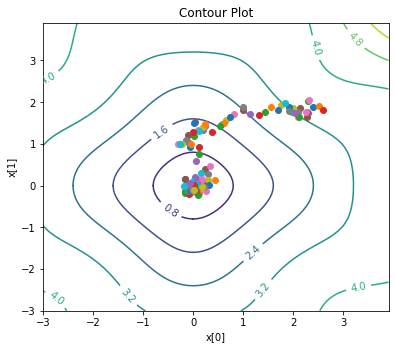

In [22]:
bounds=np.asarray([[-3.0,3.0],[-3.0,3.0]])
step_size=[0.4,0.4]
n_iterations=100
init=[2.4,2.0]
best, score, points, scores, = local_hillclimber(objective, bounds, n_iterations, step_size, init)
n, m = 7, 7
start = -3
x_vals = np.arange(start, start+7, 0.1)
y_vals = np.arange(start, start+7, 0.1)
X, Y = np.meshgrid(x_vals, y_vals)
#print(X)
#print(Y)
fig = plt.figure(figsize=(6,5))
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
ax = fig.add_axes([left, bottom, width, height])
Z = objective(np.asarray((X,Y)))
cp = ax.contour(X, Y, Z)
ax.clabel(cp, inline=True, fontsize=10)
ax.set_title('Contour Plot')
ax.set_xlabel('x[0]')
ax.set_ylabel('x[1]')
for i in range(n_iterations):
    plt.plot(points[i][0],points[i][1],"o");
plt.show()

array([[-3. , -2.9, -2.8, ...,  3.7,  3.8,  3.9],
       [-3. , -2.9, -2.8, ...,  3.7,  3.8,  3.9],
       [-3. , -2.9, -2.8, ...,  3.7,  3.8,  3.9],
       ...,
       [-3. , -2.9, -2.8, ...,  3.7,  3.8,  3.9],
       [-3. , -2.9, -2.8, ...,  3.7,  3.8,  3.9],
       [-3. , -2.9, -2.8, ...,  3.7,  3.8,  3.9]])